# Рабочая тетрадь No 5

In [116]:
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### 1.2.3 Задание

Создайте класс по работе с тригонометрическими функциями. В классе 
должны быть реализованы функции вычисления: 
- косинуса; 
- синуса; 
- тангенса; 
- арксинуса; 
- арккосинуса; 
- арктангенса; 
- перевода из градусов в радианы.

In [117]:
class TrigFunctions:
    def __init__(self, precision=10):
        # Константа для pi
        self.pi = 3.141592653589793
        # Переменная точности для вычислений
        self.precision = precision

    # Факториал для ряда Тейлора
    def factorial(self, n):
        result = 1
        for i in range(2, n + 1):
            result *= i
        return result

    # Приближенное вычисление синуса с помощью ряда Тейлора
    def sin(self, angle_radians):
        sin_approx = 0
        
        for n in range(self.precision):
            sign = (-1) ** n
            term = (angle_radians ** (2 * n + 1)) / self.factorial(2 * n + 1)
            sin_approx += sign * term
        
        return sin_approx

    # Приближенное вычисление косинуса с помощью ряда Тейлора
    def cos(self, angle_radians):
        cos_approx = 0
        
        for n in range(self.precision):
            sign = (-1) ** n
            term = (angle_radians ** (2 * n)) / self.factorial(2 * n)
            cos_approx += sign * term
        
        return cos_approx

    # Приближенное вычисление тангенса как sin/cos
    def tan(self, angle_radians):
        return self.sin(angle_radians) / self.cos(angle_radians)

    # Приближенное вычисление арксинуса с использованием метода Ньютона
    def arcsin(self, value):
        if value < -1 or value > 1:
            return None  # Арксинус определен только на отрезке [-1, 1]
        
        x = value
        
        for _ in range(self.precision):
            x -= (self.sin(x) - value) / self.cos(x)
        
        return x

    # Арккосинус как pi/2 - арксинус
    def arccos(self, value):
        return self.pi / 2 - self.arcsin(value)

    # Приближенное вычисление арктангенса с использованием метода Ньютона
    def arctan(self, value):
        x = value
        
        for _ in range(self.precision):
            x -= (self.tan(x) - value) / (1 + value ** 2)
        
        return x

In [118]:
trig_functions = TrigFunctions(precision=10)

angle = 3.141592653589793 / 4  # pi/4 радиан (45 градусов)

sin_value = trig_functions.sin(angle)
cos_value = trig_functions.cos(angle)
tan_value = trig_functions.tan(angle)
arcsin_value = trig_functions.arcsin(sin_value)
arccos_value = trig_functions.arccos(cos_value)
arctan_value = trig_functions.arctan(tan_value)

print("Угол (рад):", angle)
print("sin:", sin_value)
print("cos:", cos_value)
print("tan:", tan_value)
print("arcsin (рад):", arcsin_value)
print("arccos (рад):", arccos_value)
print("arctan (рад):", arctan_value)


Угол (рад): 0.7853981633974483
sin: 0.7071067811865475
cos: 0.7071067811865475
tan: 1.0
arcsin (рад): 0.7853981633974483
arccos (рад): 0.7853981633974483
arctan (рад): 0.7853981633974483


### 1.2.2 Задание 1

Представьте дерево показанное на рисунке с использованием списка из 
списков. Выведите на печать корень дерева, а также его левое и правое 
поддеревья.

In [119]:
tr = ['a', ['b', ['d', []], ['e', []]], ['c', ['f', []]]]

print(f"Корень: {tr[0]}")
print(f"Левое поддерево: {tr[1]}")
print(f"Правое поддерево: {tr[2]}")

Корень: a
Левое поддерево: ['b', ['d', []], ['e', []]]
Правое поддерево: ['c', ['f', []]]


### 1.2.2 Задание 2

Дан класс, описывающий бинарное дерево. 


```python
class Tree: 
   def __init__(self, data): 
      self.left = None 
      self.right = None 
      self.data = data 
   def PrintTree(self): 
      print(self.data) 
```
Реализуйте  в  классе  функцию  для  вставки  нового  элемента  в  дерево  по 
следующим правилам: 
 
- Левое поддерево узла содержит только узлы со значениями меньше, 
чем значение в узле. 
- Правое поддерево узла содержит только узлы со значениями меньше, 
чем значение в узле. 
- Каждое  из  левого  и  правого  поддеревьев  также  должно  быть 
бинарным деревом поиска. 
- Не должно быть повторяющихся узлов. 

Метод вставки сравнивает значение узла с родительским узлом и решает 
куда доваить элемент (в левое или правое поддерево). Перепишите, метод 
PrintTree для печати полной версии дерева.

In [120]:
class BinaryTree: 
    def __init__(self, data): 
        self.left = None 
        self.right = None 
        self.data = data

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = BinaryTree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = BinaryTree(data)
            else:
                self.right.insert(data)

    def Print(self, level=0):
        if self.right:
            self.right.Print(level + 1)
        
        print(' ' * 4 * level + '->', self.data)
        if self.left:
            self.left.Print(level + 1) 

In [121]:
root = BinaryTree(10)
root.insert(5)
root.insert(15)
root.insert(3)
root.insert(7)
root.insert(12)
root.insert(17)

root.Print()

        -> 17
    -> 15
        -> 12
-> 10
        -> 7
    -> 5
        -> 3


### 1.3.1 Задание

Постройте  классификатор  на  основе  дерева  принятия  решений следующего датасета:

```python
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]
```

In [122]:
ds = pd.DataFrame(np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]))
target = [0, 0, 0, 1, 1, 1]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(ds, target, test_size=0.2)

[Text(0.5, 0.75, 'x[1] <= -0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

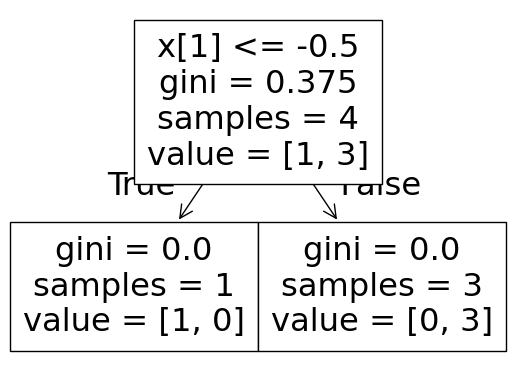

In [124]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

tree.plot_tree(classifier)

In [125]:
y_pred = classifier.predict(x_test)

print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[0 0]
[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/Users/nktkln/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### 1.4.1 Задание

Задание. Постройте модель регрессии для данных из предыдущей рабочей 
тетради.Для примера  можно  взять  потребления  газа  (в  миллионах 
галлонов) в 48 штатах США или набор данных о качестве красного вина: 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv 
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv 

Постройте прогноз. Оцените точность модели.

In [126]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

ds = pd.read_csv(url)

ds.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [127]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[Text(0.49800740259424797, 0.9722222222222222, 'x[10] <= 10.525\nsquared_error = 0.671\nsamples = 1279\nvalue = 5.647'),
 Text(0.214837677322192, 0.9166666666666666, 'x[9] <= 0.575\nsquared_error = 0.431\nsamples = 789\nvalue = 5.373'),
 Text(0.35642253995822, 0.9444444444444444, 'True  '),
 Text(0.10466867469879518, 0.8611111111111112, 'x[4] <= 0.251\nsquared_error = 0.329\nsamples = 323\nvalue = 5.164'),
 Text(0.101559463661096, 0.8055555555555556, 'x[1] <= 0.587\nsquared_error = 0.316\nsamples = 322\nvalue = 5.171'),
 Text(0.07267780800621843, 0.75, 'x[10] <= 10.05\nsquared_error = 0.338\nsamples = 148\nvalue = 5.284'),
 Text(0.04508356004663817, 0.6944444444444444, 'x[4] <= 0.08\nsquared_error = 0.267\nsamples = 114\nvalue = 5.175'),
 Text(0.027982899339292655, 0.6388888888888888, 'x[7] <= 0.996\nsquared_error = 0.38\nsamples = 58\nvalue = 5.293'),
 Text(0.01554605518849592, 0.5833333333333334, 'x[8] <= 3.365\nsquared_error = 0.196\nsamples = 15\nvalue = 4.933'),
 Text(0.0093276331

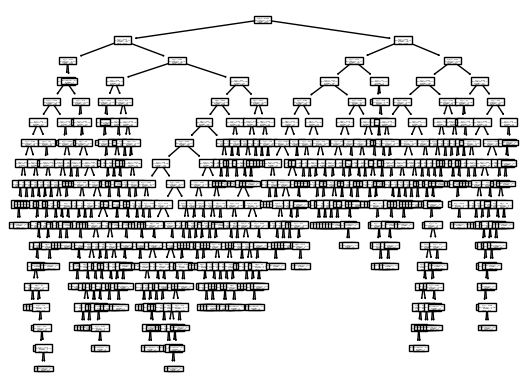

In [128]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
tree.plot_tree(regressor)

In [129]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

     Actual  Predicted
0         6        5.0
1         5        6.0
2         7        7.0
3         6        5.0
4         5        5.0
..      ...        ...
315       6        6.0
316       4        7.0
317       5        5.0
318       4        5.0
319       6        7.0

[320 rows x 2 columns]


In [130]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

MSE: 0.709375
MAE: 0.465625


8.261588715046605